In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread, imshow
from skimage.transform import resize

from tqdm import tqdm

import os
from glob import glob

In [2]:
IMG_PATH = "./data/finding-lungs-in-ct-data/2d_images"
MASK_PATH = "./data/finding-lungs-in-ct-data/2d_masks"
IMG_LIST = sorted(glob(IMG_PATH  + "/*.tif"))
MASK_LIST = sorted(glob(MASK_PATH  + "/*.tif"))

In [3]:
print("2d images 개수 : ", len(IMG_LIST), "\t2d masks 개수 : ", len(MASK_LIST))

2d images 개수 :  267 	2d masks 개수 :  267


In [4]:
IMG_SIZE = 256

In [5]:
X_data = np.zeros((len(IMG_LIST), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
Y_data = np.zeros((len(MASK_LIST), IMG_SIZE, IMG_SIZE, 1), dtype=np.bool)

In [6]:
print(X_data.shape)
print(Y_data.shape)
print(type(X_data))
print(type(Y_data))
print(X_data.max())

(267, 256, 256, 1)
(267, 256, 256, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.0


In [7]:
for i, path in tqdm(enumerate(IMG_LIST), total=len(IMG_LIST)):
    img = imread(path)
    img = resize(img, (IMG_SIZE, IMG_SIZE, 1), mode='constant', preserve_range=True)
    X_data[i] = img

for i, path in tqdm(enumerate(MASK_LIST), total=len(MASK_LIST)):
    img = imread(path)
    img = resize(img, (IMG_SIZE, IMG_SIZE, 1), mode='constant', preserve_range=True)
    Y_data[i] = img
    
#Y_data /= 255. --> Y_data 의 초기값 data type을 np.float32로 해줬으면 255로 나누어서 0 ~ 1 값의 범위로 만들어주는 Normalization을 해줘야 한다.
    

100%|██████████| 267/267 [00:01<00:00, 229.50it/s]


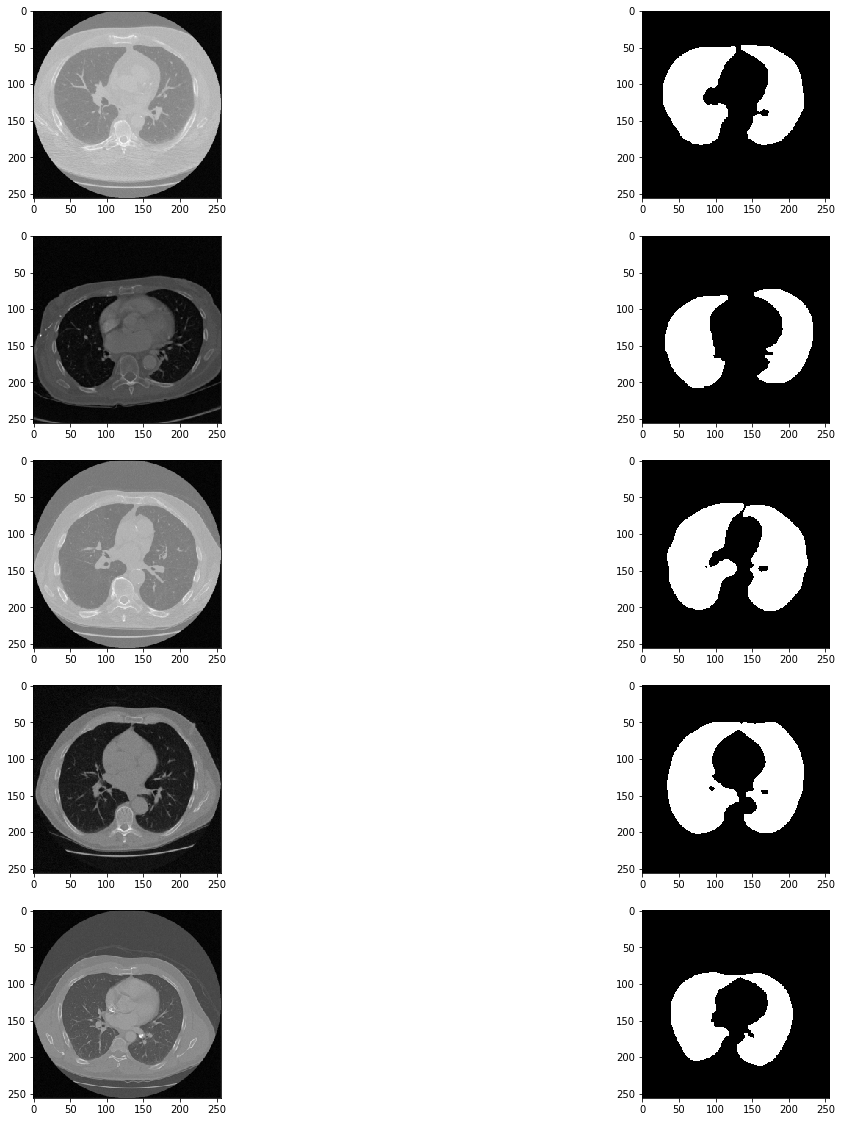

In [12]:
import random
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i in range(5):
    ix = random.randint(0, len(IMG_LIST))
    
    ax[i, 0].imshow(X_data[ix].squeeze(), cmap='gray')
    ax[i, 1].imshow(Y_data[ix].squeeze(), cmap='gray')

